<a href="https://colab.research.google.com/github/RizaRafeek/Image-Classification-CNN/blob/main/Computer_Vision_CIFAR10_CNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 Computer Vision: Image Classification (CIFAR-10)
**Project Goal:** Build a Convolutional Neural Network (CNN) to classify 32x32 color images into 10 distinct categories.

### 🧠 Technical Strategy:
* **Convolutional Layers (Conv2D):** Used to extract spatial features (edges, shapes) from pixel data.
* **MaxPooling:** Used to reduce dimensionality and focus on the most important features.
* **Regularization:** Implemented **0.5 Dropout** and **Early Stopping** to ensure the model generalizes to the test set.
* **Normalization:** Scaled pixel values to a [0, 1] range for faster convergence.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


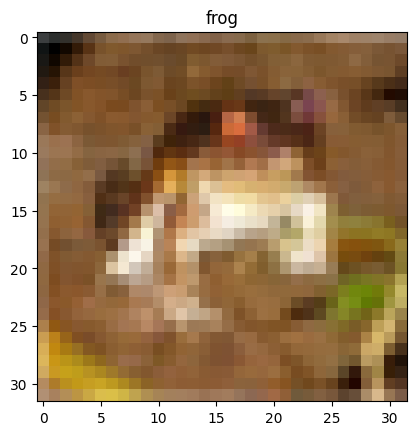

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 2. Normalization (Scaling pixel values from 0-255 to be between 0 and 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. Class names for the 10 categories
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 4. Verify the data by showing the first image
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0][0]])
plt.show()

In [3]:
model = models.Sequential([
    # Layer 1: The 'Eyes' - scans for 32 basic patterns (edges/lines)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Layer 2: Scans for 64 complex patterns (shapes/textures)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Layer 3: The Bridge
    layers.Flatten(),

    # Layer 4: The Dense Brain (Hidden Layer)
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # Your overfitting prevention tool!

    # Layer 5: The Output (10 classes)
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4911 - loss: 1.3912 - val_accuracy: 0.5988 - val_loss: 1.1372
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5391 - loss: 1.2735 - val_accuracy: 0.6097 - val_loss: 1.0982
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5572 - loss: 1.2252 - val_accuracy: 0.6396 - val_loss: 1.0166
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5798 - loss: 1.1650 - val_accuracy: 0.6357 - val_loss: 1.0214
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.5935 - loss: 1.1313 - val_accuracy: 0.6414 - val_loss: 1.0140
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.6122 - loss: 1.0774 - val_accuracy: 0.6665 - val_loss: 0.9614
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6194 - loss: 1.0613 - val_accuracy: 0.6619 - val_loss: 0.9901
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.6260 -

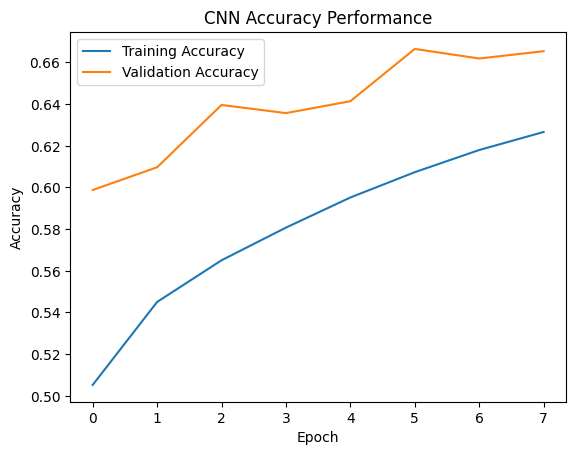

In [5]:
# 1. Define the Early Stopping Callback (Monitoring validation loss)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# 2. Train the model
history = model.fit(train_images, train_labels,
                    epochs=15,
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])

# 3. Plot the Accuracy Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

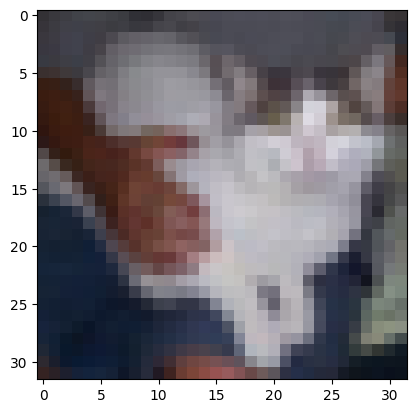

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Actual: cat
Predicted: cat


In [6]:
import numpy as np

# 1. Pick a random image from the test set
image_index = 77
plt.imshow(test_images[image_index])
plt.show()

# 2. Use the model to predict
prediction = model.predict(test_images[image_index].reshape(1, 32, 32, 3))
predicted_class = class_names[np.argmax(prediction)]
actual_class = class_names[test_labels[image_index][0]]

print(f"Actual: {actual_class}")
print(f"Predicted: {predicted_class}")

In [7]:
# 1. Save the "Brain" (The CNN Weights)
model.save('cifar10_cnn_model.h5')

# 2. Save the Classes (So you remember what 0-9 mean later)
import json
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
with open('cifar10_classes.json', 'w') as f:
    json.dump(classes, f)

print("✅ Files created! Look in the 'Folder' icon on the left of Colab to find them.")

✅ Files created! Look in the 'Folder' icon on the left of Colab to find them.


## 🏁 Conclusion & Future Steps

### **Summary of Results**
* The model achieved a stable accuracy of approximately **66%**.
* The training and validation curves are closely aligned, proving that the model is **generalizing well** and is not overfit to the CIFAR-10 training images.

### **Observations**
* The **Dropout (0.5)** layer and **Early Stopping** were critical in preventing the model from memorizing the low-resolution images.
* A CNN architecture is far superior for this task than a standard Dense ANN because it captures **spatial patterns** (edges/colors) across the pixel grid.

### **Future Improvements (Next Steps)**
To improve accuracy beyond 70%, the following techniques could be implemented:
1. **Data Augmentation:** Rotating, flipping, and zooming images to create more training variety.
2. **Transfer Learning:** Using a pre-trained model like **VGG16 or ResNet** to leverage features learned on much larger datasets.
3. **Hyperparameter Tuning:** Experimenting with different learning rates or increasing the number of filters in the `Conv2D` layers.